In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv


<div style="background-color: orange; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: black;"><strong>California_wildfire Damage and Analysis</strong></h1>
</div>

<img src="https://i.abcnewsfe.com/a/2e365fca-ca19-43a0-82df-eef11020328e/calif-fire11-ap-ml-250110_1736513441802_hpMain.jpg" width=1200>

<div style="background-color: #0000; padding: 20px; border-radius: 10px;font-size:25px;font-weight:10px">
  <h1 style="color: black;"><strong>Exploratory Data Analysis</strong></h1>
</div>

In [2]:
california_wildfire = pd.read_csv(r"/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv")

<div style="background-color: orange; padding: 25px; border-radius: 10px;">
  <h1 style="color: black;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [3]:
california_wildfire

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
95,INC1095,2018-01-16,Mendocino County,13112,1468,46,281,89,17,4008.58,Human Activity
96,INC1096,2022-07-07,Shasta County,39209,710,282,189,34,14,376.72,Human Activity
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474.78,Human Activity
98,INC1098,2014-06-24,Napa Valley,1338,1619,262,293,94,3,3308.74,Human Activity


In [4]:
california_wildfire.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


<div style="background-color: orange; padding: 25px; border-radius: 10px;">
  <h1 style="color: black;"><strong>Information About the dataset</strong></h1>
</div>

In [5]:
california_wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [6]:
california_wildfire.isnull().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [7]:
california_wildfire["Date"] = pd.to_datetime(california_wildfire["Date"])
california_wildfire['Year'] = california_wildfire['Date'].dt.year

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
palette_1 = ["darkorange", "bisque", "#e38d14", "#ebab09", "sandybrown"]
palette_2 = ["indianred", "firebrick", "lightcoral", "orangered", "tomato"]

<div style="background-color: orange; padding: 25px; border-radius: 10px;">
  <h1 style="color: black;"><strong>WildFire Damage Analysis</strong></h1>
</div>

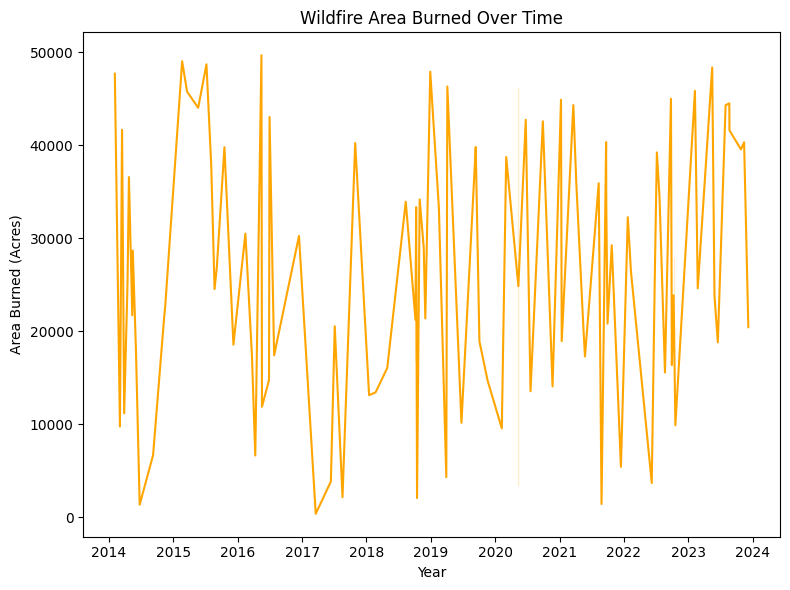

In [10]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=california_wildfire, x="Date", y="Area_Burned (Acres)",color="orange")
plt.title("Wildfire Area Burned Over Time")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.tight_layout()
plt.show()

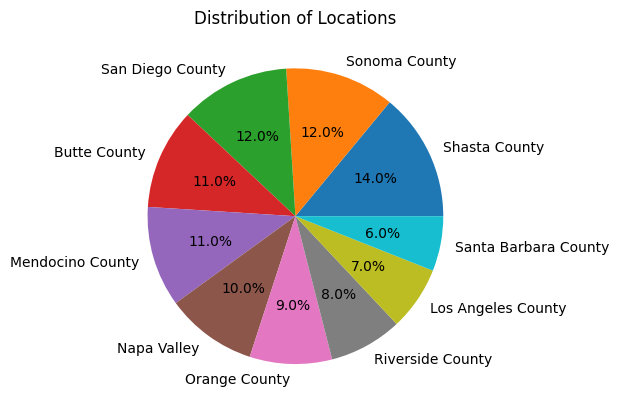

In [11]:
california_wildfire["Location"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Locations")
plt.ylabel("") 
plt.show()


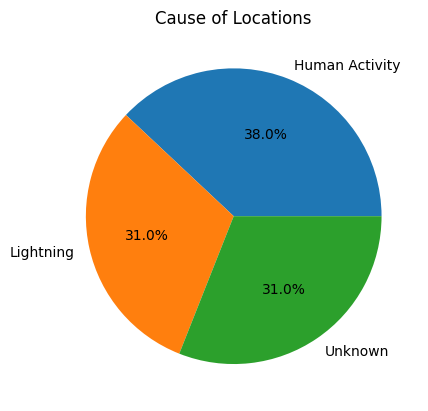

In [12]:
california_wildfire["Cause"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Cause of Locations")
plt.ylabel("") 
plt.show()

In [1]:
# California wildfire mostly caused by human activities however
# Sometimes Lightning and other activities causes wildfire we need to further see what the damages occur because of wildfire

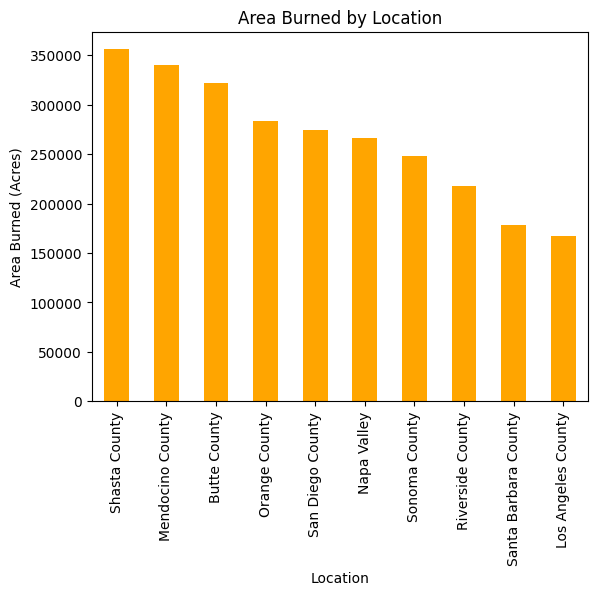

In [13]:
A_burned = california_wildfire.groupby("Location")["Area_Burned (Acres)"].sum().sort_values(ascending=False).head(10)
A_burned.plot(kind="bar",color = "orange")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Location")
plt.ylabel("Area Burned (Acres)")
plt.title("Area Burned by Location")
plt.show()

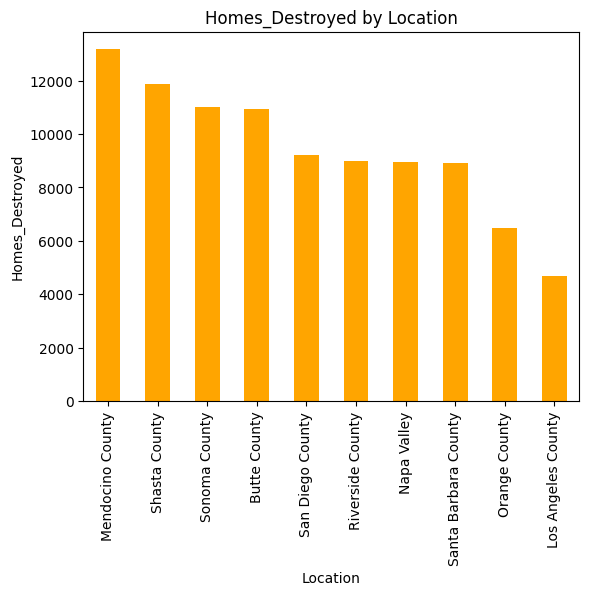

In [14]:
H_Destroyed = california_wildfire.groupby("Location")["Homes_Destroyed"].sum().sort_values(ascending = False).head(10)
H_Destroyed.plot(kind="bar",color = "orange")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Location")
plt.ylabel("Homes_Destroyed")
plt.title("Homes_Destroyed by Location")
plt.show()

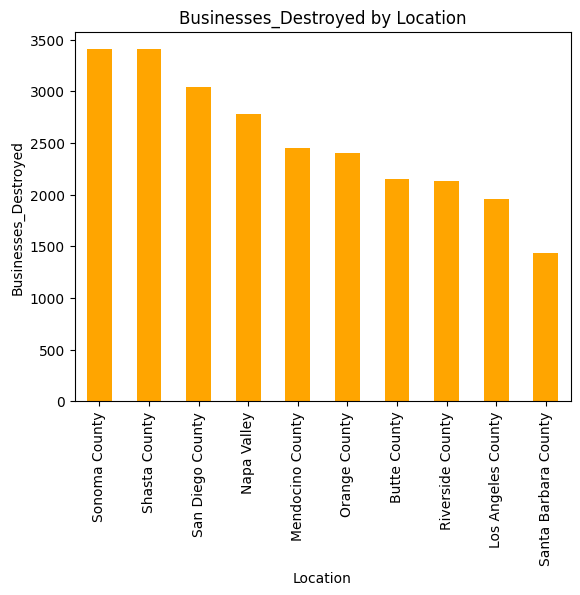

In [15]:
B_Destroyed = california_wildfire.groupby("Location")["Businesses_Destroyed"].sum().sort_values(ascending = False).head(10)
B_Destroyed.plot(kind="bar",color = "orange")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Location")
plt.ylabel("Businesses_Destroyed")
plt.title("Businesses_Destroyed by Location")
plt.show()

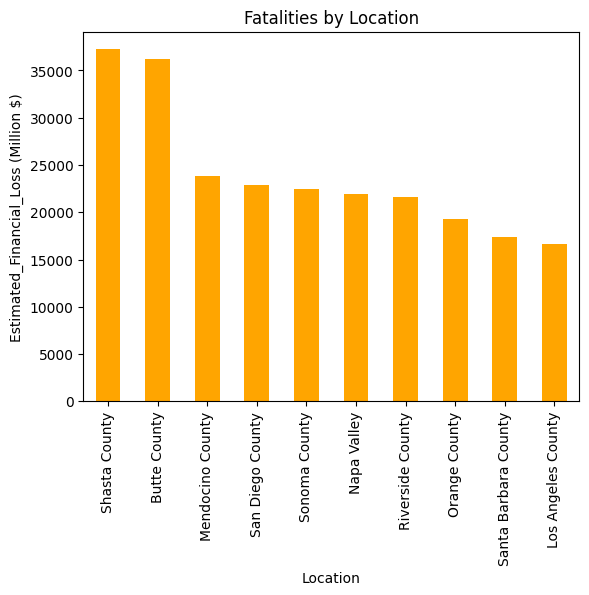

In [16]:
Loss = california_wildfire.groupby("Location")["Estimated_Financial_Loss (Million $)"].sum().sort_values(ascending = False).head(10)
Loss.plot(kind="bar",color = "orange")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Location")
plt.ylabel("Estimated_Financial_Loss (Million $)")
plt.title("Fatalities by Location")
plt.show()

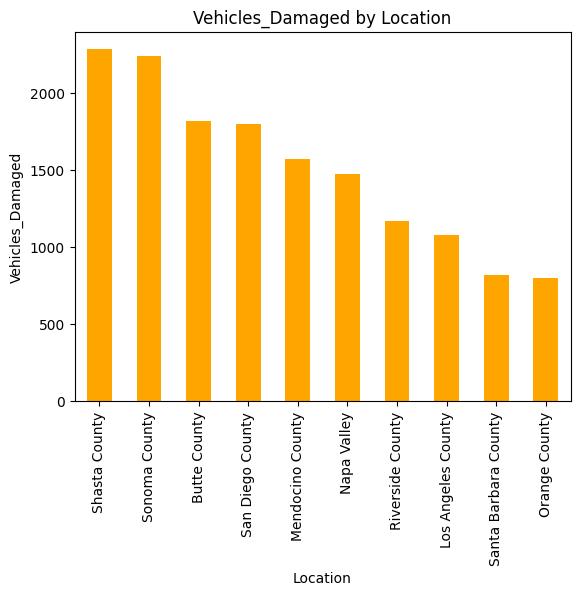

In [17]:
V_Destroyed = california_wildfire.groupby("Location")["Vehicles_Damaged"].sum().sort_values(ascending = False).head(10)
V_Destroyed.plot(kind="bar",color = "orange")
plt.xticks(rotation=90)  
plt.xlabel("Location")
plt.ylabel("Vehicles_Damaged")
plt.title("Vehicles_Damaged by Location")
plt.show()

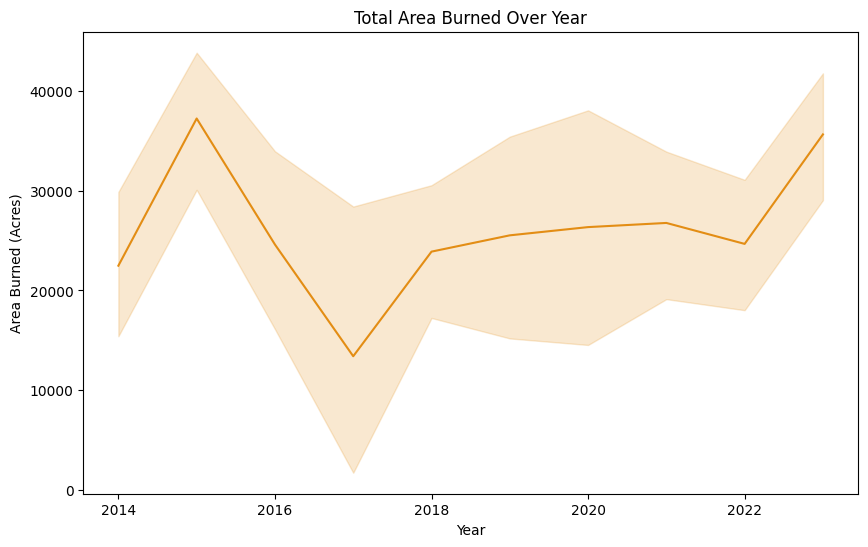

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=california_wildfire, x='Year', y='Area_Burned (Acres)', color=palette_1[2])
plt.title("Total Area Burned Over Year")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.show()

In [2]:
#In above lineplot we see area burning over year due to wildfire


In [ ]:
# Financial Loss by cause of WildFire

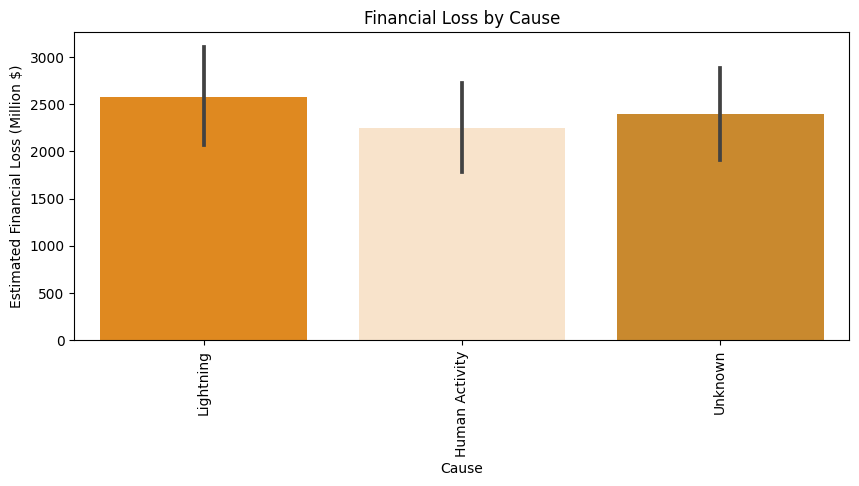

In [20]:
plt.figure(figsize=(10, 4))
sns.barplot(data=california_wildfire, x="Cause", y="Estimated_Financial_Loss (Million $)", palette=palette_1)
plt.title("Financial Loss by Cause")
plt.xlabel("Cause")
plt.ylabel("Estimated Financial Loss (Million $)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Distribution of Area Burned due to wildfire

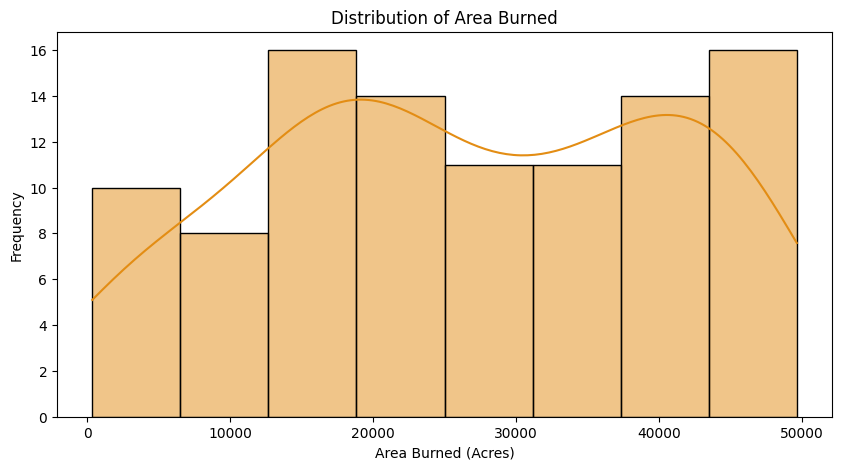

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=california_wildfire, x="Area_Burned (Acres)", kde=True, color=palette_1[2])
plt.title("Distribution of Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Area Burned vs Financial Loss, sized by Fatalities

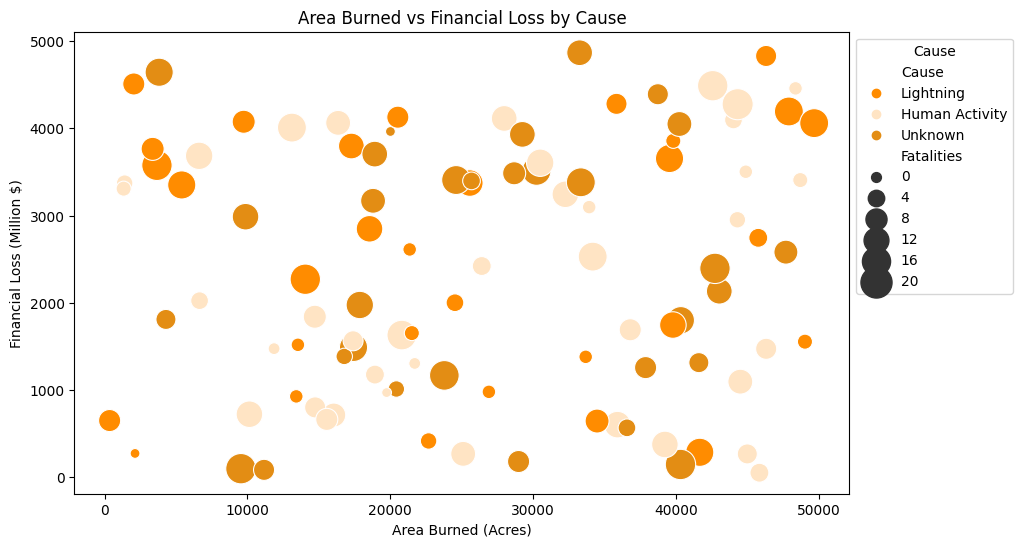

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= california_wildfire, x= "Area_Burned (Acres)", y= "Estimated_Financial_Loss (Million $)", size= "Fatalities", hue= "Cause", sizes=(50, 500), palette=palette_1)
plt.title("Area Burned vs Financial Loss by Cause")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Financial Loss (Million $)")
plt.legend(title="Cause", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [3]:
# Average number of homes, businesses, and vehicles destroyed per cause

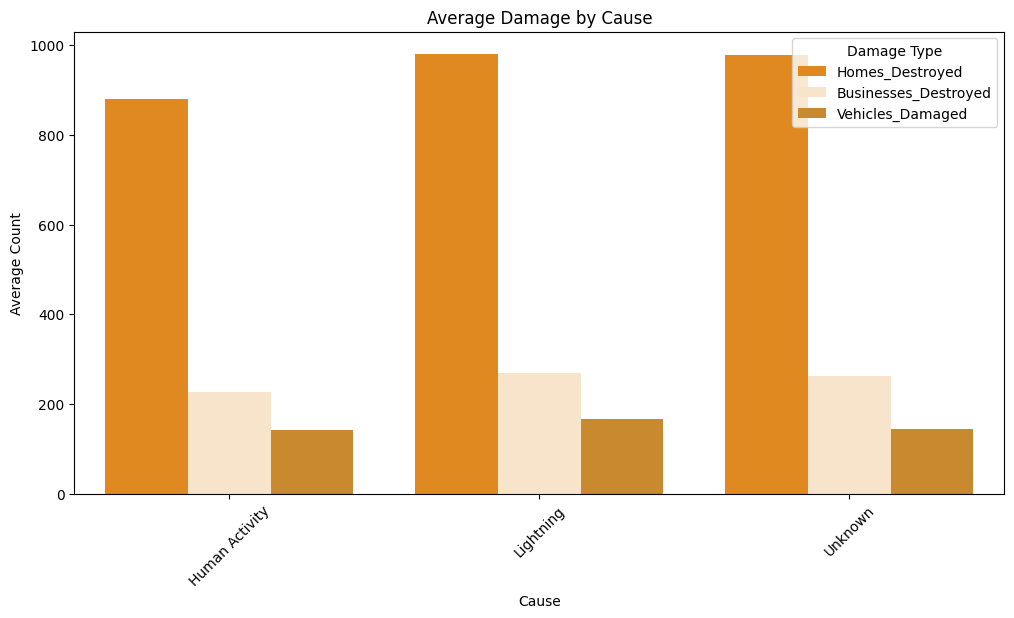

In [23]:
damage_avg = california_wildfire.groupby("Cause")[["Homes_Destroyed", "Businesses_Destroyed", "Vehicles_Damaged"]].mean().reset_index()
damage_avg_melted = damage_avg.melt(id_vars='Cause', var_name='Type', value_name='Average Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=damage_avg_melted, x= "Cause", y='Average Count', hue='Type', palette=palette_1)
plt.title("Average Damage by Cause")
plt.xlabel("Cause")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Damage Type")
plt.show()

<div style="background-color: orange; padding: 25px; border-radius: 10px;">
  <h1 style="color: black;"><strong>Final Insights</strong></h1>
</div>

1.Severe Financial Losses: Wildfires have caused significant financial damage, with losses reaching into the billions.

2.High Casualties: There are multiple fatalities and injuries across different incidents, highlighting the human cost.

3.Main Causes: Lightning-Triggered Fires cause the highest financial losses.

4.Variability in Damage: Some wildfires cause extensive destruction (thousands of homes destroyed), while others are less severe.

5.Frequent Wildfire-Prone Locations: Counties like Sonoma and Shasta appear multiple times, suggesting they are high-risk areas.

<div style="background-color: orange; padding: 25px; border-radius: 10px;">
  <h1 style="color: black;"><strong>Recommendation for Prevention of WildFire</strong></h1>
</div>

1. Early Detection Systems: Install weather-based lightning trackers to predict high-risk areas.
2. Lightning Rods: Protect power lines and critical infrastructure from igniting.
3. Public Awareness & Fire Safety Training: Educate communities on campfire safety, cigarette disposal, and equipment use.
4. Stronger Law Enforcement: Increase penalties for arson and negligence.
5. Surveillance & Drones: Deploy aerial monitoring to track potential fire hazards.
6. Stricter Fire Regulations: Enhance policies for land management and wildfire mitigation.
7. Lightning-Triggered Fires cause the highest financial losses—improving early detection and fuel management is key.
8. Unknown Causes need better forensic tracking and surveillance.
9. Human-Related Fires can be reduced through education, stronger laws, and infrastructure maintenance.
